In [31]:
import window_make
import Ridge
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


# Read Data

In [2]:
PATH_NAME_CO2 = 'archive.csv'
train = pd.read_csv(PATH_NAME_CO2, encoding='CP949')

In [3]:
train

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...,...
715,2017,8,2017.6219,NaN,NaN,NaN,NaN
716,2017,9,2017.7068,NaN,NaN,NaN,NaN
717,2017,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,11,2017.8740,NaN,NaN,NaN,NaN


In [4]:
train = train.to_numpy()

In [5]:
print("Total data shape is", train.shape)
print("The number of sample is ",len(train[0]))
co2 = train[:,3]

Total data shape is (720, 7)
The number of sample is  7


### Data visualization

Text(0.5, 0, 'time series')

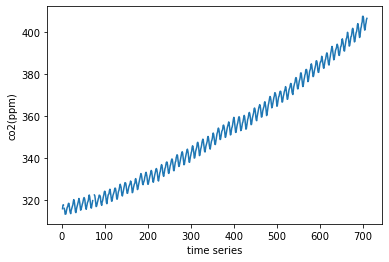

In [6]:
plt.plot(co2)
plt.ylabel('co2(ppm)')
plt.xlabel('time series')

# Window sliding

In [7]:
X_i,Y_i = window_make.dowlist(co2,7) 

In [8]:
print("The number of sample widows are", X_i.shape[0])
print("Window size is", X_i.shape[1])

The number of sample widows are 683
Window size is 7


# Ridge regression

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics


# divide test data and train data
X_train, X_test, Y_train, Y_test = train_test_split(X_i, Y_i, test_size=0.2, random_state=1)

# training
X_norm = stats.zscore(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_mean = np.mean(X_train,axis=0)

beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,0.1)


In [35]:
# test
test_norm = (X_test-X_mean)/X_std
Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.5402609281251806 0.7350244404951312


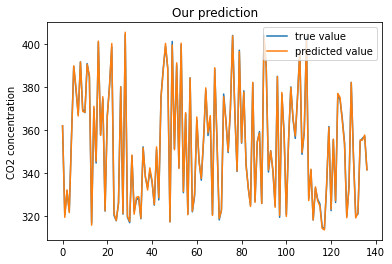

In [11]:
plt.plot(range(len(Y_pred)),Y_test,label='true value')
plt.plot(range(len(Y_pred)),Y_pred,label = 'predicted value')
plt.ylabel('CO2 concentration')
plt.title('Our prediction')
plt.legend()
plt.show()


# Test using Sklearn Library

## Test data split

In [12]:
# test용 코드
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_i, Y_i, test_size=0.2,random_state=1)

ridge = linear_model.Ridge(alpha=0.0001).fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
score_ridge = ridge.score(X_test, Y_test)
mse_ridge = mean_squared_error(Y_test, Y_pred)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.3f}, RMSE:{2:.3f}".format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.999, MSE:0.412, RMSE:0.642


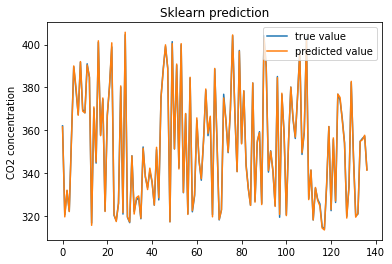

In [13]:
# comparison true value and predicted value

count = np.array(range(Y_test.shape[0]))
plt.title('Sklearn prediction')
plt.plot(count, Y_test, label='true value')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_pred, label='predicted value')
plt.legend()
plt.show()

# Checking Alpha dependence

In [37]:
alpha_list = np.linspace(0,10,100)


mse_l = []
for a in alpha_list:
    beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,a)
    
    #test data
    
    test_norm = (X_test-X_mean)/X_std
    Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

    mse = mean_squared_error(Y_test, Y_pred)

    print("Alpha : ",a,"Result MSE, RMSE ",mse, np.sqrt(mse))
    mse_l.append(np.sqrt(mse))
    

Alpha :  0.0 Result MSE, RMSE  0.4119166106804497 0.6418073002704547
Alpha :  0.10101010101010101 Result MSE, RMSE  0.5417264465622206 0.7360206835152261
Alpha :  0.20202020202020202 Result MSE, RMSE  0.6749800046918837 0.8215716674106305
Alpha :  0.30303030303030304 Result MSE, RMSE  0.784309518930146 0.8856125105993851
Alpha :  0.40404040404040403 Result MSE, RMSE  0.8767944234444293 0.9363730151197381
Alpha :  0.5050505050505051 Result MSE, RMSE  0.9576150245290882 0.9785780625627616
Alpha :  0.6060606060606061 Result MSE, RMSE  1.0300790565338613 1.0149281041206129
Alpha :  0.7070707070707071 Result MSE, RMSE  1.0963590901099072 1.0470716738169872
Alpha :  0.8080808080808081 Result MSE, RMSE  1.1579354605547432 1.07607409621956
Alpha :  0.9090909090909091 Result MSE, RMSE  1.2158483499757402 1.1026551364664023
Alpha :  1.0101010101010102 Result MSE, RMSE  1.2708469120825705 1.1273184608097973
Alpha :  1.1111111111111112 Result MSE, RMSE  1.3234815996581137 1.1504267032967002
Alpha 

Text(0.5, 1.0, '$\\lambda$ dependency')

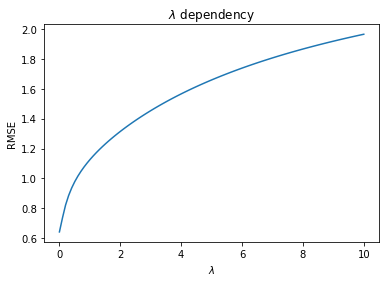

In [38]:
plt.plot(alpha_list.tolist(),mse_l)
plt.xlabel('$\lambda$')
plt.ylabel('RMSE')
plt.title('$\lambda$ dependency')

# cross validation

In [16]:
import numpy as np 
from sklearn.model_selection import KFold 
kf = KFold(n_splits=7) 
Train = []
Test = []
for train, test in kf.split(X_i): 
    print("%s %s" % (len(train), len(test)))
    Train.append(train)
    Test.append(test)



585 98
585 98
585 98
585 98
586 97
586 97
586 97


In [17]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0) 
Train = []
Test = []
for train_index, test_index in ss.split(X_i): 
    Train.append(train_index)
    Test.append(test_index)
print("%s %s" % (len(train_index), len(test_index)))




512 171


(0.6, 1.0)

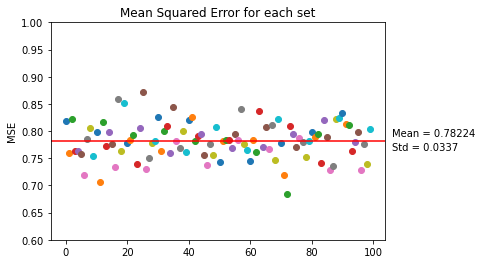

In [60]:
from sklearn.metrics import mean_squared_error
mse_l = []
for i in range(len(Train)):
    #test data
    train = Train[i]
    test = Test[i]
    
    X_norm = stats.zscore(X_i[train],axis=0)
    X_std = np.std(X_i[train],axis=0)
    X_mean = np.mean(X_i[train],axis=0)

    beta_ridge, beta_0 = Ridge.solve(X_norm, Y_i[train],0.1)
    #test data
    
    # test
    test_norm = (X_i[test]-X_mean)/X_std
    Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

    mse = mean_squared_error(Y_i[test], Y_pred)
    plt.scatter(i,np.sqrt(mse))
    mse_l.append(np.sqrt(mse))
plt.title('Mean Squared Error for each set')
plt.ylabel('MSE')
plt.axhline(y=0.7822, color='r', linestyle='-')
plt.text(106,0.79,'Mean = 0.78224')
plt.text(106,0.765,'Std = 0.0337')
plt.ylim([0.6,1])

In [19]:
print("Mean mse is ", np.mean(mse_l))
print("Mean mse is ", np.std(mse_l))

Mean mse is  0.782246917490864
Mean mse is  0.03371675962961953


# cross validation x alpha dependence

In [64]:
def cross_validation(c_x,c_y,alpha):
    ss = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0) 
    Train = []
    Test = []
    for train_index, test_index in ss.split(c_x): 
        Train.append(train_index)
        Test.append(test_index)
    
    
    mse_l = []
    for i in range(len(Train)):
    #test data
        train = Train[i]
        test = Test[i]
    
        X_norm = stats.zscore(c_x[train],axis=0)
        X_std = np.std(c_x[train],axis=0)
        X_mean = np.mean(c_x[train],axis=0)

        beta_ridge, beta_0 = Ridge.solve(X_norm, c_y[train],alpha)
        #test data
        
        # test
        test_norm = (c_x[test]-X_mean)/X_std
        Y_pred = np.matmul(test_norm, beta_ridge)+beta_0
        
        mse = mean_squared_error(c_y[test], Y_pred)
        
        mse_l.append(np.sqrt(mse))
    return np.mean(mse_l)

In [65]:
alpha_list = np.linspace(0,2,30)


mean_mse_l = []
for a in alpha_list:
    mean_mse_l.append(cross_validation(X_i,Y_i,a))
   

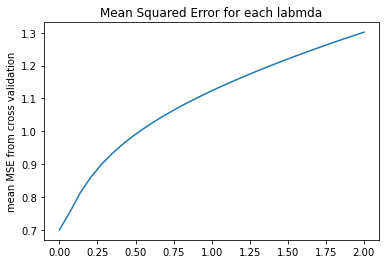

In [66]:
plt.plot(alpha_list,mean_mse_l)
plt.title('Mean Squared Error for each labmda')
plt.ylabel('mean MSE from cross validation')
plt.show()

In [77]:
Y = np.hstack([Y_test, Y_pred])
n = Y_test.shape[0]


Y_copy = Y.copy()

for i in range(1,n):
    key = Y[i,:].copy()
    for k in range(i):
        print(Y[:3,0])
        if Y[i-1-k,0]> key[0]:
            save = Y[i-1-k,:].copy()
            print(key)
            print(Y[i-1-k,:])
            Y[i-k,:] = save
            Y[i-1-k,:] = key
            print(key)
        else:
            print(k)
            break

print(Y.shape)
            

[362.05 320.58 331.75]
[320.58       320.10385877]
[362.05       362.06742894]
[320.58       320.10385877]
[320.58 362.05 331.75]
[331.75       332.54869237]
[362.05       362.06742894]
[331.75       332.54869237]
[320.58 331.75 362.05]
1
[320.58 331.75 362.05]
[322.25       322.56385493]
[362.05       362.06742894]
[322.25       322.56385493]
[320.58 331.75 322.25]
[322.25       322.56385493]
[331.75       332.54869237]
[322.25       322.56385493]
[320.58 322.25 331.75]
2
[320.58 322.25 331.75]
[357.16       356.67560397]
[362.05       362.06742894]
[357.16       356.67560397]
[320.58 322.25 331.75]
1
[320.58 322.25 331.75]
0
[320.58 322.25 331.75]
[378.81       380.56922217]
[389.62       390.49193587]
[378.81       380.56922217]
[320.58 322.25 331.75]
1
[320.58 322.25 331.75]
[367.31       367.52177387]
[389.62       390.49193587]
[367.31       367.52177387]
[320.58 322.25 331.75]
[367.31       367.52177387]
[378.81       380.56922217]
[367.31       367.52177387]
[320.58 322.25 331.

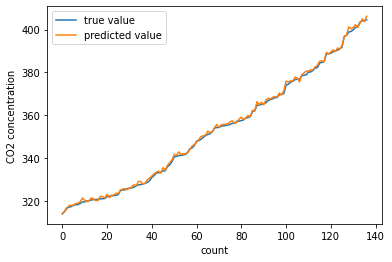

In [78]:
count = np.array(range(Y.shape[0]))

plt.plot(count, Y[:,0], label='true value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y[:,1], label='predicted value')
plt.legend()
plt.show()

In [75]:
# 전체 데이터에 대해서 prediction

X_total = standard(X_i)
Y_total_pred = np.matmul(X_total, beta_ridge)+beta_0

mse = mean_squared_error(Y_i, Y_total_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.48740636649374164 0.6981449466219329


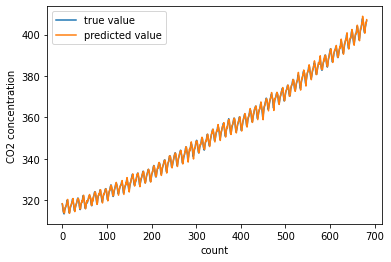

In [76]:
count = np.array(range(Y_total_pred.shape[0]))
plt.plot(count, Y_total_pred, label='predicted value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_i, label='true value')
plt.legend()
plt.show()

# Try 2

#### 시각적으로 보기 좋게 하기 위해 다시 test 진행

In [95]:
X_train = X_i[:500, :]
X_test = X_i[500:, :]
Y_train = Y_i[:500]
Y_test = Y_i[500:]

In [101]:
X_std = np.zeros(shape=(X_train.shape[0],X_train.shape[1]))

X_std, X_mean = standard(X_train)

beta_ridge, beta_0 = solve(X_std, Y_train)

In [103]:
X_mean = X_mean[1:]
print(X_mean)

[[339.97286]
 [340.0892 ]
 [340.19824]
 [340.30186]
 [340.4026 ]
 [340.50592]
 [340.60964]]


In [105]:
print(X_test[:3])
a = X_test - np.transpose(X_mean)
print(a[:3])

[[374.02 373.31 371.62 369.55 367.96 368.1  369.68]
 [373.31 371.62 369.55 367.96 368.1  369.68 371.24]
 [371.62 369.55 367.96 368.1  369.68 371.24 372.44]]
[[34.04714 33.2208  31.42176 29.24814 27.5574  27.59408 29.07036]
 [33.33714 31.5308  29.35176 27.65814 27.6974  29.17408 30.63036]
 [31.64714 29.4608  27.76176 27.79814 29.2774  30.73408 31.83036]]


In [106]:
# test
test_std = X_test - np.transpose(X_mean)
Y_pred = np.matmul(test_std, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.6222206246713322 0.7888096251132666


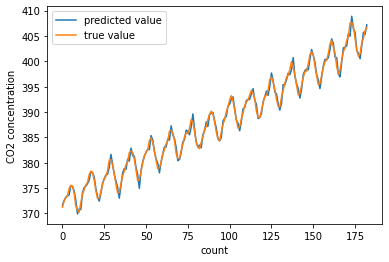

In [107]:
count = np.array(range(Y_pred.shape[0]))
plt.plot(count, Y_pred, label='predicted value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_test, label='true value')
plt.legend()
plt.show()